In [62]:
import os
import cv2
import numpy
from matplotlib import pyplot as plt

In [63]:
def get_average_brightness(img, left_bound, right_bound, bottom_bound, top_bound):
  if right_bound < left_bound or top_bound < bottom_bound:
    raise Exception('Wrong bounds!')
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cropped_gray_image = gray_image[bottom_bound:top_bound, left_bound:right_bound]
  h, w = cropped_gray_image.shape
  denominator = h * w
  nominator = 0
  for i in range(h):
    for k in range(w):
      nominator += cropped_gray_image[i, k]
  return nominator / denominator

Задаем границы работы в изображении
проходим по каждому изображению из папки
для каждого фото получаем значения + или - ev
составляем массив значений и рисуем график

In [64]:
left_bound = 600
right_bound = 2500
bottom_bound = 300
top_bound = 1500
data_dir = 'input1/'
ev = []
startv = 2.0
cur_ev = 2.17
avg_brightness = []
for filename in os.listdir(data_dir):
  print(f'process {filename}')

  cur_ev = startv - (0.17 * ((int)(filename.split('.')[0]) - 1))
  ev.append(cur_ev)
  image = cv2.imread(data_dir + filename)
  avg_brightness.append(get_average_brightness(image, left_bound, right_bound, bottom_bound, top_bound))

[ev, avg_brightness]

process 1.jpg
process 10.jpg
process 11.jpg
process 12.jpg
process 13.jpg
process 14.jpg
process 15.jpg
process 16.jpg
process 17.jpg
process 18.jpg
process 19.jpg
process 2.jpg
process 20.jpg
process 21.jpg
process 22.jpg
process 23.jpg
process 24.jpg
process 25.jpg
process 3.jpg
process 4.jpg
process 5.jpg
process 6.jpg
process 7.jpg
process 8.jpg
process 9.jpg


[[2.0,
  0.47,
  0.2999999999999998,
  0.1299999999999999,
  -0.040000000000000036,
  -0.20999999999999996,
  -0.38000000000000034,
  -0.5500000000000003,
  -0.7200000000000002,
  -0.8900000000000001,
  -1.06,
  1.83,
  -1.2300000000000004,
  -1.4000000000000004,
  -1.5700000000000003,
  -1.7400000000000002,
  -1.9100000000000001,
  -2.08,
  1.66,
  1.49,
  1.3199999999999998,
  1.15,
  0.98,
  0.8099999999999998,
  0.6399999999999999],
 [221.17429429824563,
  73.81036754385966,
  67.82280833333333,
  60.55989780701754,
  53.409025,
  52.30059824561403,
  48.60462807017544,
  43.136654824561404,
  36.89785175438597,
  33.894657894736845,
  30.191644736842104,
  208.0431552631579,
  26.425620614035086,
  22.061345614035087,
  20.189939912280703,
  18.159605701754387,
  16.79203596491228,
  14.164854824561404,
  192.7075855263158,
  175.08832807017544,
  149.2938052631579,
  128.70019298245614,
  112.04684254385965,
  97.47868333333334,
  85.73722850877193]]

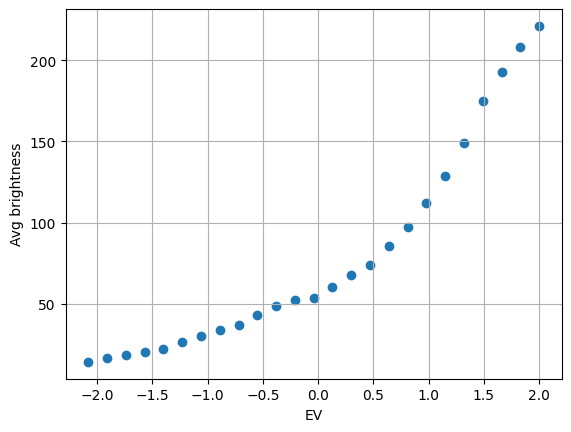

In [65]:
plt.scatter(ev, avg_brightness)
plt.xlabel('EV')
plt.ylabel('Avg brightness')
plt.grid()